<a href="https://colab.research.google.com/github/Alex-Ukraine/ml-selfedu/blob/main/Bidirectional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import Dense, GRU, Input, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

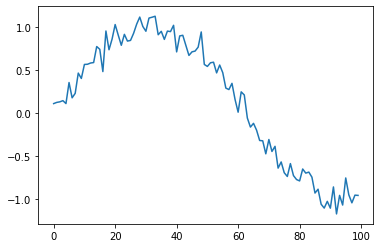

In [3]:
N = 10000
data = np.array([np.sin(x/20) for x in range(N)]) + 0.1*np.random.randn(N)
plt.plot(data[:100])
plt.show()

In [4]:
off = 3
length = off*2 + 1
X = np.array([np.diag(np.hstack((data[i:i+off], data[i+off+1:i+length]))) for i in range(N-length) ])
Y = data[off:N-off-1]
print(X.shape, Y.shape, sep='\n')

(9993, 6, 6)
(9993,)


In [6]:
model = Sequential()
model.add(Input((length-1, length-1)))
model.add(Bidirectional(GRU(2)))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 4)                 120       
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='mean_squared_error', optimizer=Adam(0.01))

In [8]:
history = model.fit(X, Y, batch_size=32, epochs=10)

Epoch 1/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0330
Epoch 2/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0140
Epoch 3/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0129
Epoch 4/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0124
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0123
Epoch 6/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0124
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0123
Epoch 8/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0122
Epoch 9/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0123
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0122


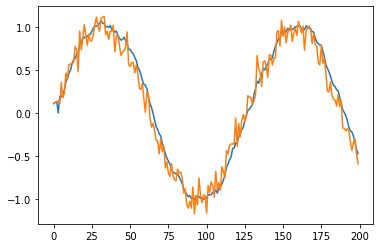

In [9]:
M = 200
XX = np.zeros(M)
XX[:off] = data[:off]
for i in range(M-off-1):
    x = np.diag(np.hstack( (XX[i:i+off], data[i+off+1:i+length])))
    x = np.expand_dims(x, axis=0)
    y = model.predict(x)
    XX[i+off+1] = y

plt.plot(XX[:M])
plt.plot(data[:M])
plt.show()